In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## About the DataSet
#### The car company wants to enter a new market and needs an estimation of exactly which variables affect the car prices.

- The goal is:

    - Which variables are significant in predicting the price of a car
    - How well do those variables describe the price of a car

In [2]:
filepath = r"scrap price.csv"

df = pd.read_csv(filepath)

#### Exploring the Dataset

In [3]:
df.head(10)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
df.shape

(205, 26)

In [5]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df[df.duplicated()]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#### There are no null or duplicated data points.

## Target Variable 'price'

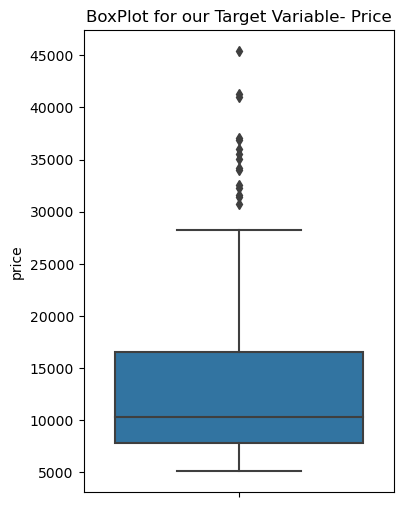

In [8]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['price'])

plt.title("BoxPlot for our Target Variable- Price")
plt.show()

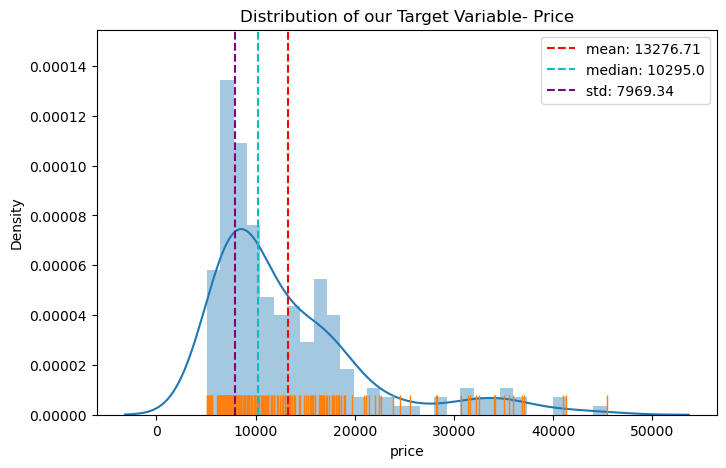

In [9]:
plt.figure(figsize=(8,5))

sns.distplot(df['price'], bins=30)
sns.rugplot(df['price'],height=0.05)

price_mean = round(np.mean(df['price']),2)
price_median = round(np.median(df['price']),2)
price_std = round(np.std(df['price']),2)


plt.axvline(x=np.mean(df['price']), linestyle='--', color='r', label=f'mean: {price_mean}')
plt.axvline(x=np.median(df['price']), linestyle='--', color='c', label=f'median: {price_median}')
plt.axvline(x=np.std(df['price']), linestyle='--', color='purple', label=f'std: {price_std}')

plt.title("Distribution of our Target Variable- Price")
plt.legend()
plt.show()

#### We can observe that:
- The average selling price of cars of USD 13276.71 with a standard deviation of USD 7969.34 

#### Positively Skewed
- From the above visualization we can observe that the price distribution is positively skewed meaning most selling cars have a lower price and fewer cars have a higher selling price.
- The presence of outliers has caused the mean price to be higher than the median, since mean is affected by outliers and median is not to some extent, hence in this dataset median provides a better measure for the central tendancy.

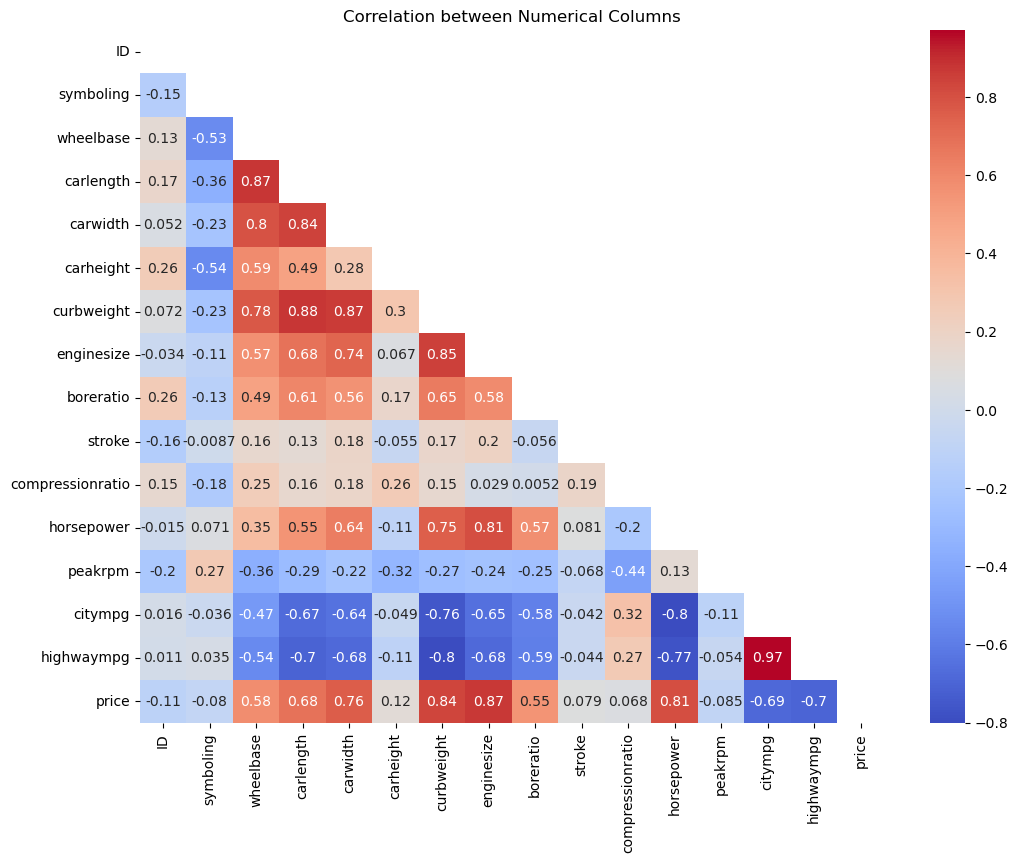

In [10]:
plt.figure(figsize=(12,9))

Corr_mat = df.corr()
mask=np.triu(np.ones_like(Corr_mat))
sns.heatmap(Corr_mat, annot=True, cmap='coolwarm',mask=mask)

plt.title("Correlation between Numerical Columns")
plt.tight_layout
plt.show()

We can see a few columns have a fairly strong relationship with our target variable, we can further dive into those features.

1. Car Length
2. Car Width
3. Curb Weight
4. Engine Size
5. Horse Power
6. City Mpg
7. Highway Mpg

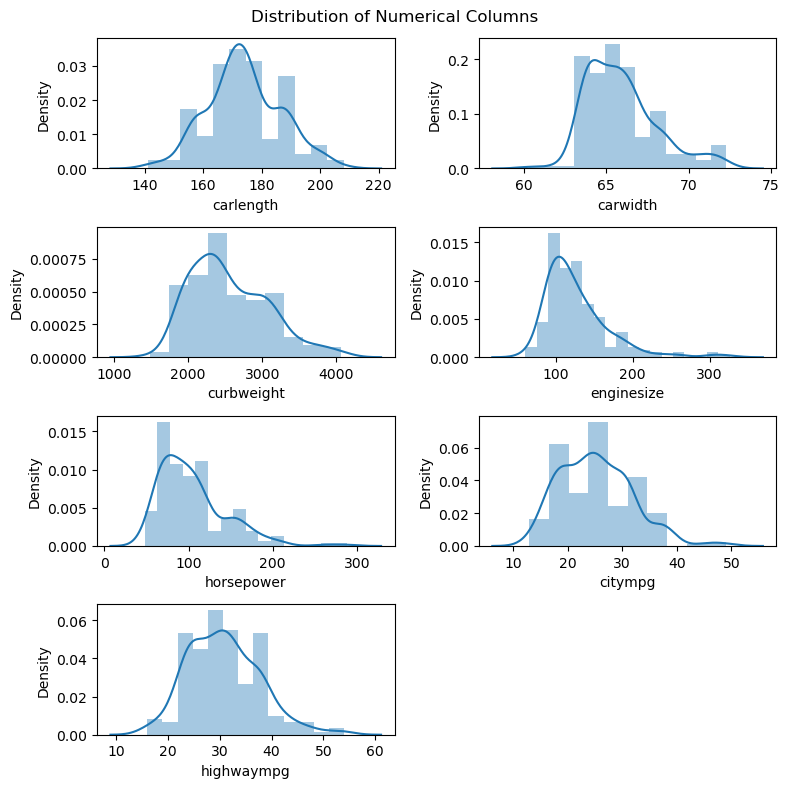

In [11]:
features = ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']
        
plt.figure(figsize=(8,8))
    
for i, column in enumerate(features, start=1):
    plt.subplot(4,2,i)
    sns.distplot(x=df[column])
    plt.xlabel(column)
    
plt.suptitle("Distribution of Numerical Columns")
plt.tight_layout()
plt.show()

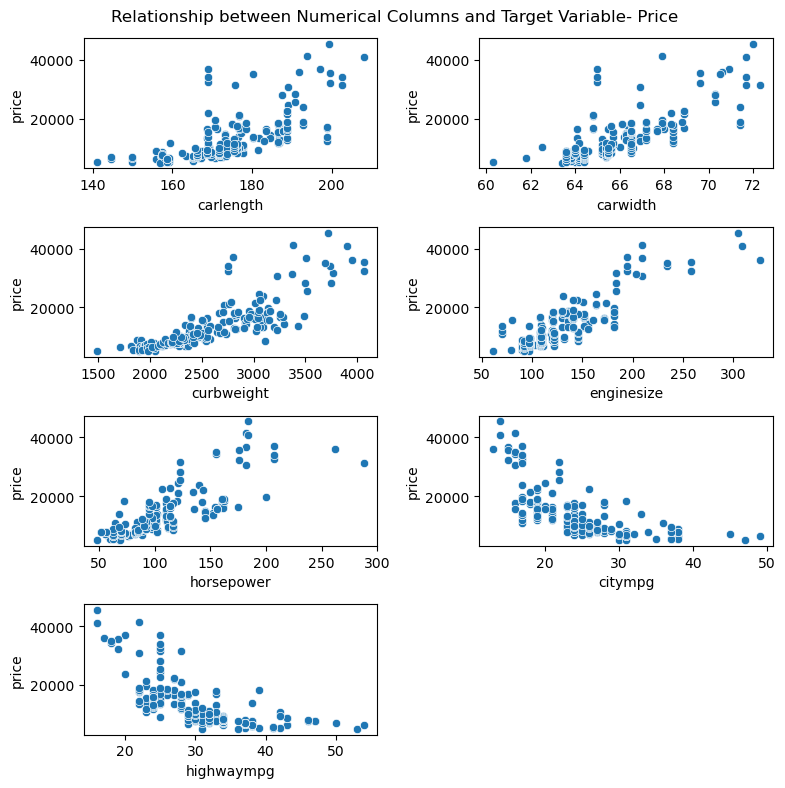

In [12]:
plt.figure(figsize=(8,8))
    
for i, column in enumerate(features, start=1):
    plt.subplot(4,2,i)
    sns.scatterplot(x=df[column], y=df['price'])
    plt.xlabel(column)
    
plt.suptitle("Relationship between Numerical Columns and Target Variable- Price")
plt.tight_layout()
plt.show()

### From the above we can see:

#### the price has a positive linear relationship with all the features except City mpg and Highway mpg which have a negative linear relationship with price

### Exploring Categorical Variables

In [13]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols[1:]
cat_cols

Index(['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [14]:
for i, col in enumerate(cat_cols):
    print(f'{col.title()}: {df[col].unique()}')

Fueltypes: ['gas' 'diesel']
Aspiration: ['std' 'turbo']
Doornumbers: ['two' 'four']
Carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Drivewheels: ['rwd' 'fwd' '4wd']
Enginelocation: ['front' 'rear']
Enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


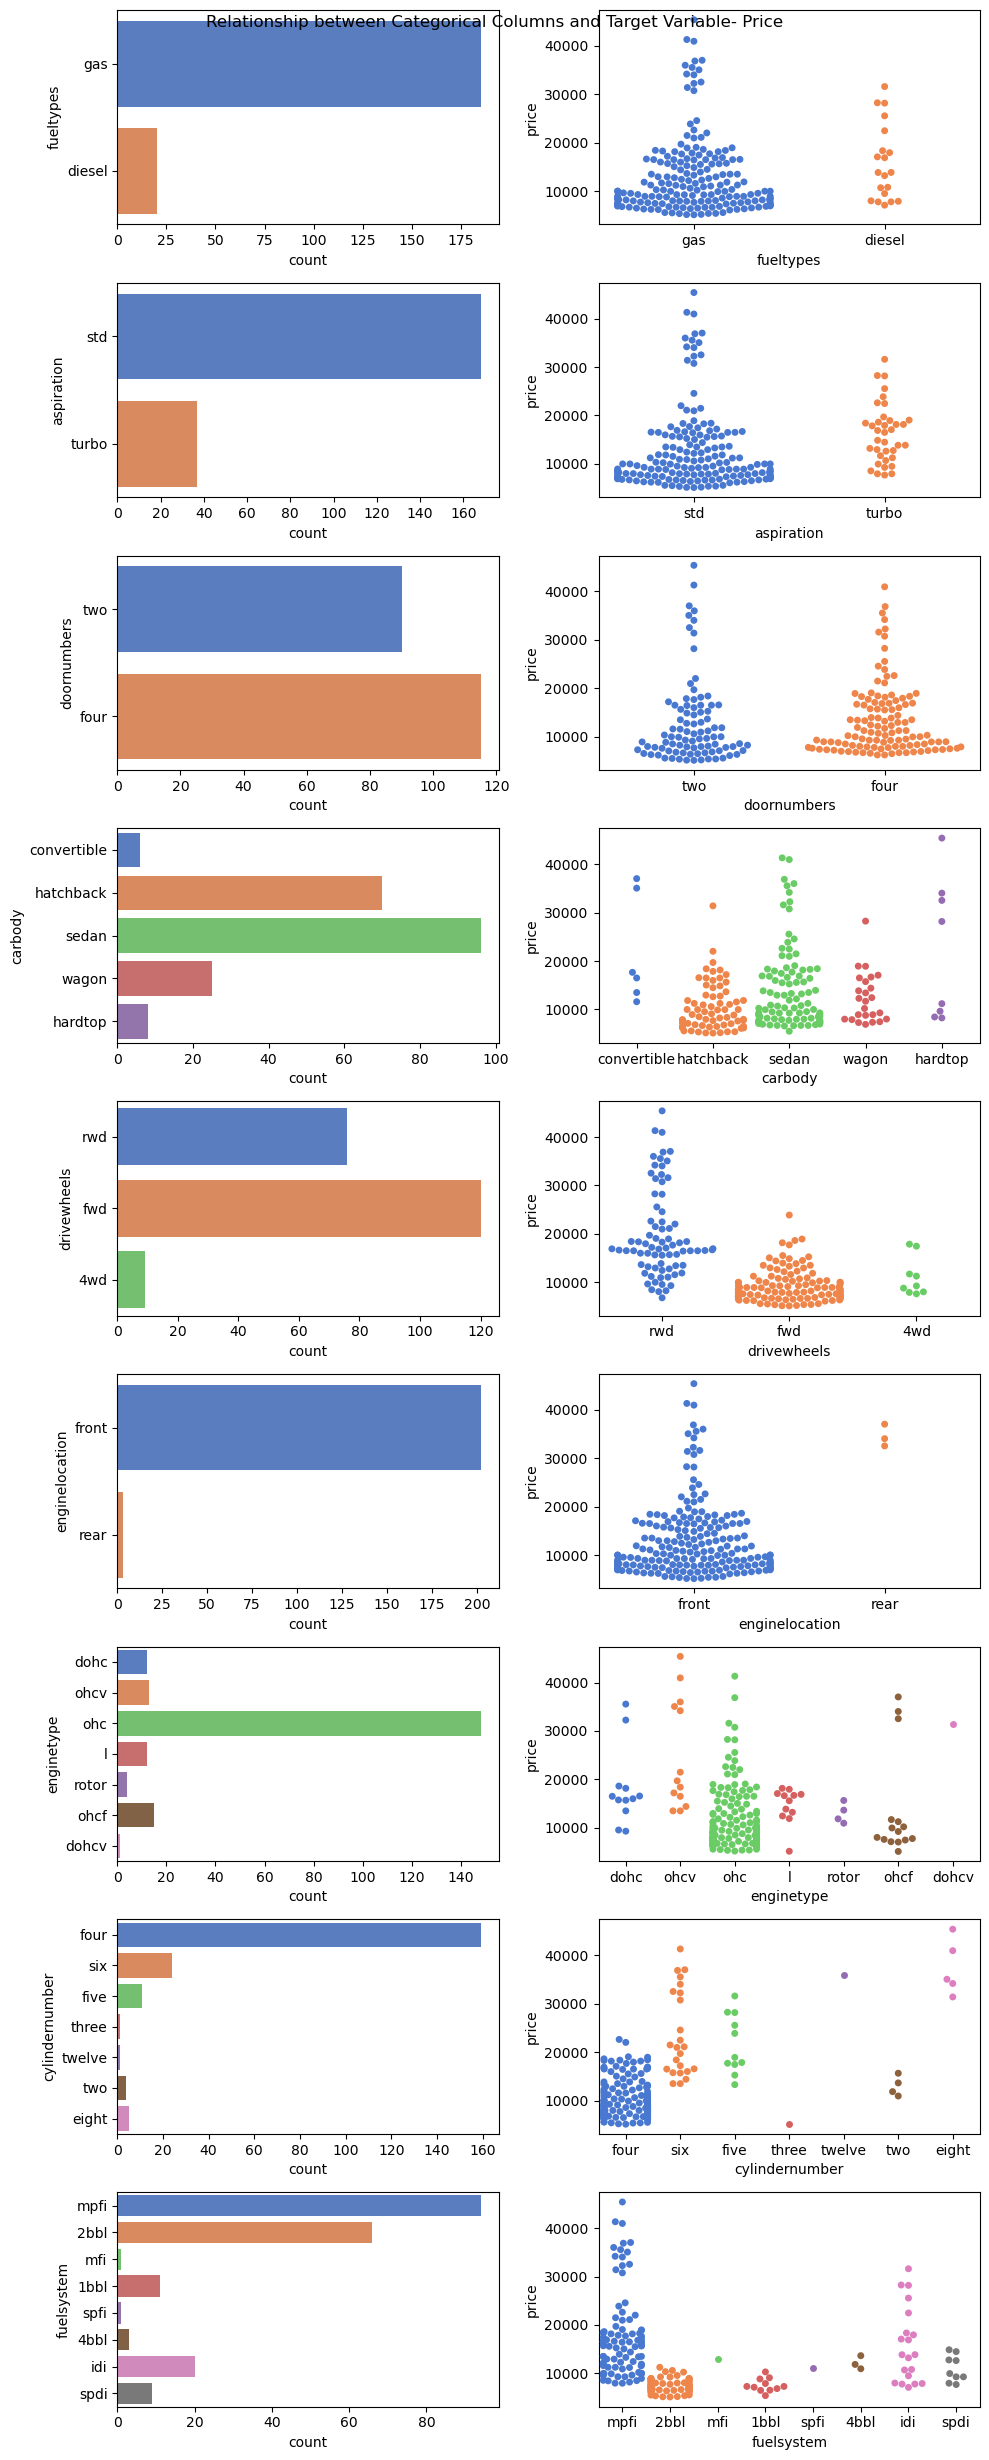

In [15]:
palette = 'muted'

fig, axes = plt.subplots(figsize=(10,25), ncols=2, nrows=9)

sns.countplot(data=df, y='fueltypes', ax=axes[0,0], palette=palette)
sns.swarmplot(data=df, x='fueltypes', y='price', ax=axes[0,1], palette=palette)

sns.countplot(data=df, y='aspiration', ax=axes[1,0], palette=palette)
sns.swarmplot(data=df, x='aspiration', y='price', ax=axes[1,1], palette=palette)

sns.countplot(data=df, y='doornumbers', ax=axes[2,0], palette=palette)
sns.swarmplot(data=df, x='doornumbers', y='price', ax=axes[2,1], palette=palette)

sns.countplot(data=df, y='carbody', ax=axes[3,0], palette=palette)
sns.swarmplot(data=df, x='carbody', y='price', ax=axes[3,1], palette=palette)

sns.countplot(data=df, y='drivewheels', ax=axes[4,0], palette=palette)
sns.swarmplot(data=df, x='drivewheels', y='price', ax=axes[4,1], palette=palette)

sns.countplot(data=df, y='enginelocation', ax=axes[5,0], palette=palette)
sns.swarmplot(data=df, x='enginelocation', y='price', ax=axes[5,1], palette=palette)

sns.countplot(data=df, y='enginetype', ax=axes[6,0], palette=palette)
sns.swarmplot(data=df, x='enginetype', y='price', ax=axes[6,1], palette=palette)

sns.countplot(data=df, y='cylindernumber', ax=axes[7,0], palette=palette)
sns.swarmplot(data=df, x='cylindernumber', y='price', ax=axes[7,1], palette=palette)

sns.countplot(data=df, y='fuelsystem', ax=axes[8,0], palette=palette)
sns.swarmplot(data=df, x='fuelsystem', y='price', ax=axes[8,1], palette=palette)

plt.suptitle("Relationship between Categorical Columns and Target Variable- Price")
plt.tight_layout()
plt.show()

#### From the above we can see:

1. People prefer to buy cars running on `gas` over diesel, thus:
    - The fuel system `MPFI` has the largest count among other fuel systems, since it is used in cars run by `gas`

2. People prefer Sedans (the highest) and Hatchbacks (second highest) which are family cars, thus we can also observe:
    - The door number count of `4` is also the highest.
    - The `front` engine location is also the highest.
3. Since most cars have a 4 or a 6 cylinders:
    - We can see that the cars having `4` cylinder has the highest count.

## Statistical Testing

### Is average horsepower of sedans here a good representation of the sedans overall?

- Averge Sedans range from 150-300 horsepower, taking an average here: 225

- Source: https://medium.com/@wiack/what-is-a-good-amount-of-horsepower-for-a-car-f8c815906d20#:~:text=Sedans,between%20150%20to%20300%20horsepower.


#### Conducting a 1 sample two tailed t-test

In [16]:
# Formulating the Hypothesis
Ho: "The average horsepower of sedans in this dataset is the same as the average horsepower of all sedans"
Ha: "The average horsepower of sedans in this dataset is different as the average horsepower of all sedans"

# Defining the alpha
alpha=0.05

# Filtering relevant data
sedan_hp = df[df['carbody']=='sedan']['horsepower']

tcal, pval = stats.ttest_1samp(a=sedan_hp, popmean=225)

print(f"T calculated: {tcal}")
print(f"P value: {pval}")
print('-------------------------------')


if pval<alpha:
    print("The average horsepower of sedans in this dataset is different as the average horsepower of all sedans.")
else:
    print("The average horsepower of sedans in this dataset is the same as the average horsepower of all sedans.")

T calculated: -32.13669611875244
P value: 7.799724424641416e-53
-------------------------------
The average horsepower of sedans in this dataset is different as the average horsepower of all sedans.


In [17]:
lower_tcri = stats.t.ppf(q=0.025,df=95)

if tcal<lower_tcri:
    print("The average horsepower of sedans in this dataset is different as the average horsepower of all sedans.")
else:
    print("The average horsepower of sedans in this dataset is the same as the average horsepower of all sedans.")

The average horsepower of sedans in this dataset is different as the average horsepower of all sedans.


In [18]:
se = np.std(sedan_hp)/sqrt(len(sedan_hp))

lower_range, upper_range = stats.t.interval(confidence=0.95, loc=np.mean(sedan_hp), scale=se, df=95)

print(f"The sample mean lies in between: {round(lower_range,2)}hp & {round(upper_range,2)}hp ")

The sample mean lies in between: 95.61hp & 110.59hp 


### Based on the test conducted above: 

#### We can conclude that the sedans in this data do not represent accurate detail about the horsepower of sedans in general.

## Building a  Muliple Linear Regression Model using OLS

In [19]:
# input features
X = df[['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower']]

# target variable
y = df['price']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {X_test.shape}")

X_train shape: (143, 5)
X_test shape: (62, 5)
y_train shape: (143,)
y_test shape: (62, 5)


In [21]:
lr = LinearRegression()

model = lr.fit(X_train, y_train)
mse = model.score(X_train, y_train)

print(f"Intercept(bias): {round(model.intercept_,2)}")
print(f"Coefficient(weight): {np.round(model.coef_,2)}")
print(f"Mean Squared Error: {round(mse,2)}")

Intercept(bias): -49204.28
Coefficient(weight): [-58.74 741.08   4.58  64.82  38.27]
Mean Squared Error: 0.83


In [22]:
y_pred = model.predict(X_test)

pred_df = pd.DataFrame(y_pred, columns=['Predicted Price'])

In [23]:
actual_price = pd.DataFrame(y_test)
actual_price.rename(columns={'price': 'Actual Price'}, inplace=True)
actual_price.reset_index(drop=True, inplace=True)

In [24]:
comparison_df = pd.concat([pred_df, actual_price], axis=1)
comparison_df

,Predicted Price,Actual Price
0,7373.864829,7738.0
1,9987.842296,8495.0
2,11678.769534,8845.0
3,9326.907677,9298.0
4,8889.491260,7603.0
...,...,...
57,11298.686354,8921.0
58,18290.029608,12964.0
59,7882.950272,7775.0
60,8094.577745,10295.0


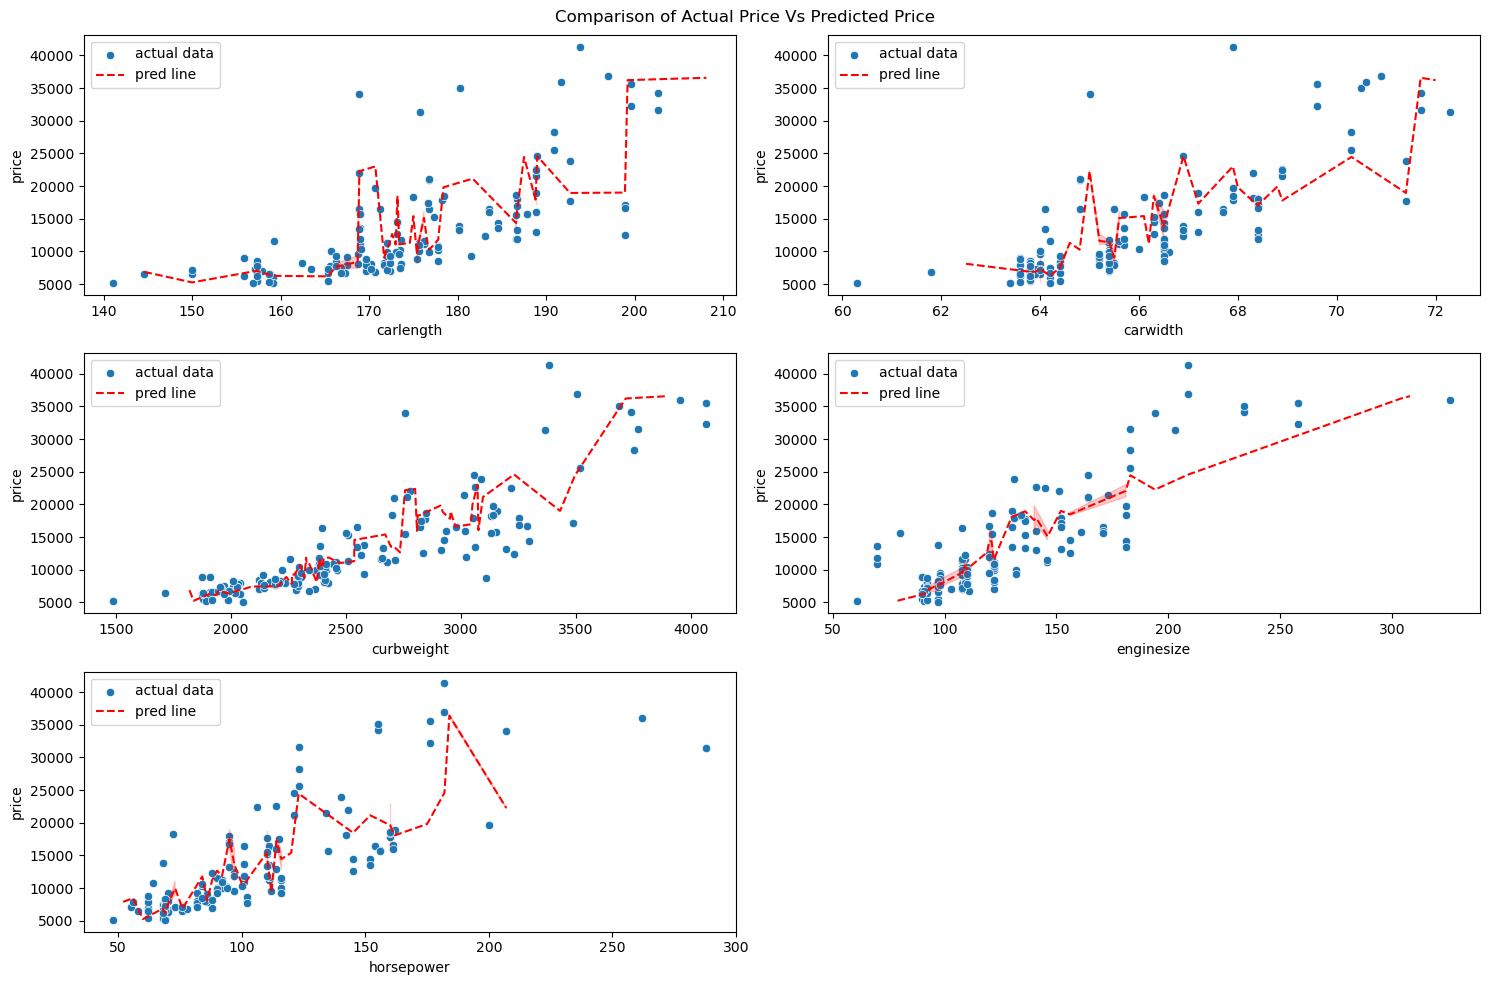

In [25]:
plt.figure(figsize=(15,10))

for i, column in enumerate(X_train.columns):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=X_train[column], y=y_train, label='actual data')
    sns.lineplot(x=X_test[column], y=y_pred, c='r', linestyle='--', label='pred line')

plt.suptitle("Comparison of Actual Price Vs Predicted Price")
plt.tight_layout()
plt.show()

In [26]:
n_rows = y_test.shape[0]

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_score = r2_score(y_test, y_pred)
adj_r2 = 1 - ((1-r2_score)*(n_rows-1))/(n_rows-1-X_test.shape[1])


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2_score}")
print(f"Adj R2 Score: {adj_r2}")

MAE: 2597.5601110217713
MSE: 14773098.481306367
RMSE: 3843.5788636772327
R2 Score: 0.7890434229472965
Adj R2 Score: 0.7702080142818766


## From the above visualization: 

#### We can conclude that our model is overfit and is a poor multiple linear regression model for predicting house prices.

## Building a model using Gradient Descent

#### including the citympg and highwaympg column

In [27]:
X = pd.concat([X, df['citympg'], df['highwaympg']], axis=1)
X

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg
0,168.8,64.1,2548,130,111,21,27
1,168.8,64.1,2548,130,111,21,27
2,171.2,65.5,2823,152,154,19,26
3,176.6,66.2,2337,109,102,24,30
4,176.6,66.4,2824,136,115,18,22
...,...,...,...,...,...,...,...
200,188.8,68.9,2952,141,114,23,28
201,188.8,68.8,3049,141,160,19,25
202,188.8,68.9,3012,173,134,18,23
203,188.8,68.9,3217,145,106,26,27


### Feature Engineering 
- Introducing 2 new metrics:
    1. car size = `car length * car width`
    2. avg mpg = `(citympg + highwaympg)/2`

In [28]:
X['carsize'] = X['carlength']*X['carwidth']
X['avgmpg'] = (X['citympg']+X['highwaympg'])/2
X

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,carsize,avgmpg
0,168.8,64.1,2548,130,111,21,27,10820.08,24.0
1,168.8,64.1,2548,130,111,21,27,10820.08,24.0
2,171.2,65.5,2823,152,154,19,26,11213.60,22.5
3,176.6,66.2,2337,109,102,24,30,11690.92,27.0
4,176.6,66.4,2824,136,115,18,22,11726.24,20.0
...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952,141,114,23,28,13008.32,25.5
201,188.8,68.8,3049,141,160,19,25,12989.44,22.0
202,188.8,68.9,3012,173,134,18,23,13008.32,20.5
203,188.8,68.9,3217,145,106,26,27,13008.32,26.5


#### Creating a copy of X 

In [29]:
X_copy = X.copy()

### Checking for Multi-Collinearity between:

1. Car Length and Car Size
2. Car Width and Car Size
3. City MPG and Avg MPG
4. Highway MPG and Avg MPG

#### Using 2 Methods: Heatmap and Variance Inflation Factor (VIF)

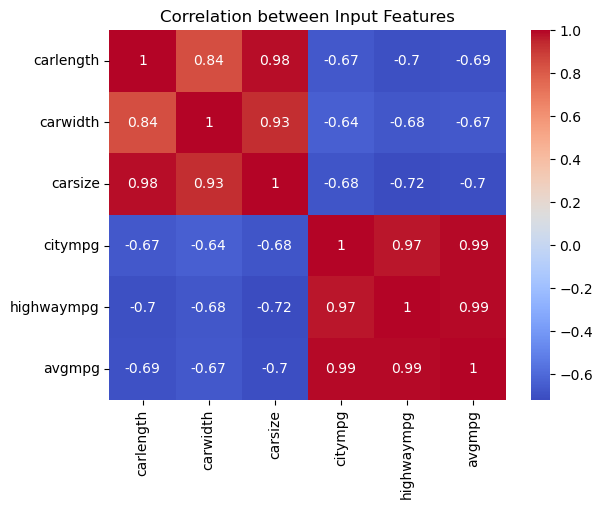

In [30]:
temp_df = X[['carlength', 'carwidth', 'carsize', 'citympg', 'highwaympg', 'avgmpg']]

sns.heatmap(data=temp_df.corr(), cmap='coolwarm', annot=True)

plt.title("Correlation between Input Features")
plt.show()

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i, column in enumerate(temp_df):
    vif = variance_inflation_factor(X, exog_idx=i)
    print(f"VIF in {column.title()}: {vif}")

VIF in Carlength: 3606.714637372283
VIF in Carwidth: 1256.764920410424
VIF in Carsize: 308.526888408078
VIF in Citympg: 55.9286475102111
VIF in Highwaympg: 46.99478533971651
VIF in Avgmpg: inf


## We can conclude that:

There is a high multi-collinearity in our dataset.

- Carlength: VIF = 3606.71
- Carwidth: VIF = 1256.76
- Carsize: VIF = 308.53

- Since Car Size is a product of car length and car width they were bound to be related and have high multi-collinearity. We can see this from the heatmap as well
    - Carlength and Carsize - 0.98
    - Carwidth and Carsize - 0.93

- Citympg: VIF = 55.93
- Highwaympg: VIF = 46.99
- Avgmpg: VIF = inf
- Since Avg MPG is an average of city mpg and highway mpg they were bound to be related and have high multi-collinearity.  We can see that from the heatmap as well:
    - Citympg and Avgmpg - 0.99
    - Citympg and Avgmpg - 0.99

- Having said this, a high vif (generally >=5) means that our features are related to one or more independent features and this may affect the accuracy of our model.

- It seems wise to not include:
    - Car Length, Car Width, City Mpg and Highway MPG in our features anymore, since we have:
    - Car Size and Avg Mpg as their substitutes.
- This will help in our model being more accurate, avoid overfitting and save computational resources.

In [32]:
X.drop(['carlength', 'carwidth', 'citympg', 'highwaympg'], axis=1, inplace=True)
X

,curbweight,enginesize,horsepower,carsize,avgmpg
0,2548,130,111,10820.08,24.0
1,2548,130,111,10820.08,24.0
2,2823,152,154,11213.60,22.5
3,2337,109,102,11690.92,27.0
4,2824,136,115,11726.24,20.0
...,...,...,...,...,...
200,2952,141,114,13008.32,25.5
201,3049,141,160,12989.44,22.0
202,3012,173,134,13008.32,20.5
203,3217,145,106,13008.32,26.5


### Feature Scaling
- Using Standard Scaler from sklearn to normalize the input features

In [33]:
# Storing mean and std of input features for future reference

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

In [34]:
from sklearn.preprocessing import StandardScaler

st_sc = StandardScaler()
X_scaled = st_sc.fit_transform(X)

### Builing the model

In [35]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

gd = SGDRegressor()
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=20)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (164, 5)
Shape of X_test: (41, 5)
Shape of y_train: (164,)
Shape of y_test: (41,)


In [36]:
model = gd.fit(X_train, y_train)

print(f"Intercept: {np.round(model.intercept_, 2)}")
print(f"Weights: {np.round(model.coef_, 2)}")

Intercept: [13341.66]
Weights: [1380.24 3477.4  2278.37  807.28   76.27]


In [37]:
y_pred = gd.predict(X_test)

## Visualizing and checking the accuracy of the model

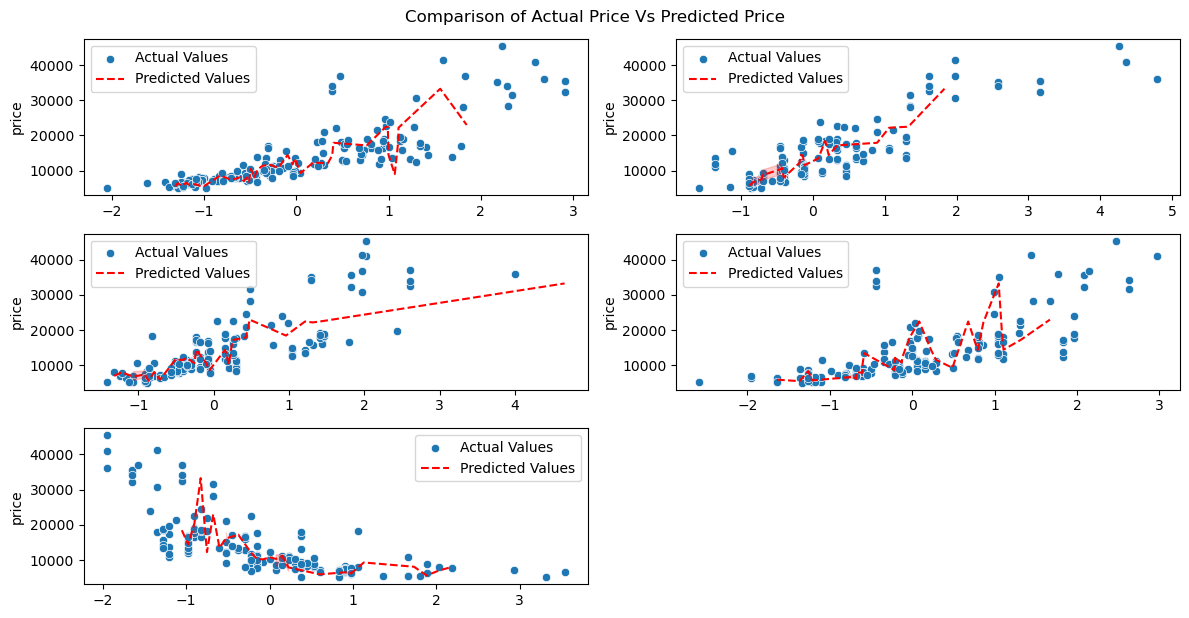

In [38]:
plt.figure(figsize=(12,8))

for i in range(X_train.shape[1]):
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=X_train[:,i], y=y_train, label='Actual Values')
    sns.lineplot(x=X_test[:,i], y=y_pred, label='Predicted Values', c='r', linestyle='--')
    
plt.suptitle("Comparison of Actual Price Vs Predicted Price")
plt.tight_layout()
plt.legend()
plt.show()

In [39]:
n_rows = y_test.shape[0]

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
r2_score = r2_score(y_true=y_test, y_pred=y_pred)
adj_r2 = 1 - ((1-r2_score)*(n_rows-1))/(n_rows-1-X_test.shape[1])

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2_score}")
print(f"Adj R2: {adj_r2}")

MAE: 1776.2825370998282
MSE: 6715106.627650427
RMSE: 2591.352277798298
R2 Score: 0.7792368380645821
Adj R2: 0.7476992435023796


## We can conclude that:

#### This model is a better and accurate model than the first one, since the performace metrics MSE, MAE, RMSE have reduced significantly with very little effect on R2 and Adjust R2 Score.

#### Having said that:

- Though the R2 and Adjusted R2 Scores are good the Mean Absolute Error, Mean Sqaured Error and Root Mean Sqaured Error tell us something different.
- So do the scatter plot, indicating that our model is a poor fit at determining car prices. 